In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

import os
os.chdir("/content/drive/MyDrive/PROJECT_3")

Mounted at /content/drive


In [2]:
with open("Oscar/Oscar/output_cross_entropy_optimize/log.txt") as f:
  data = f.read().splitlines()

In [3]:
training_log = [item for item in data if 'global_step' in item]

In [4]:
idx = [training_log.index(item) for item in training_log if 'global_step: 20,' in item]

In [5]:
idx

[0]

In [6]:
# training_log = training_log[1048:]

In [7]:
training_log[0].split(',')[1:]

['624 vlpretrain INFO: Epoch: 0',
 ' global_step: 20',
 ' lr: 0.000030',
 ' loss: 3.1810 (4.2937)',
 ' score: 0.4702 (0.3650)']

In [8]:
epoch = []
step = []
lr = []
loss = []
loss_tn = []
score = []
score_tn = []

In [9]:
for item in training_log:
  epoch_str, step_str, lr_str, loss_str, score_str = item.split(',')[1:]
  epoch.append(int(epoch_str[-2:].strip()))
  step.append(int(step_str.split(":")[-1].strip()))
  lr.append(float(lr_str.split(":")[-1].strip()))
  loss_str = loss_str.split(":")[-1][:-1]
  score_str = score_str.split(":")[-1][:-1]
  loss_, loss_tn_ = loss_str.split("(")
  loss.append(float(loss_.strip()))
  loss_tn.append(float(loss_tn_.strip()))
  score_, score_tn_ = score_str.split("(")
  score.append(float(score_.strip()))
  score_tn.append(float(score_tn_.strip()))

In [10]:
from matplotlib import pyplot as plt

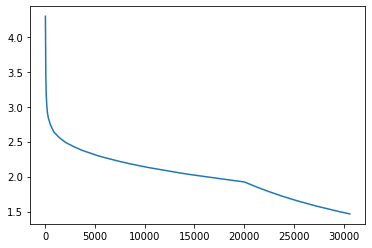

In [11]:
plt.plot(step, loss_tn)

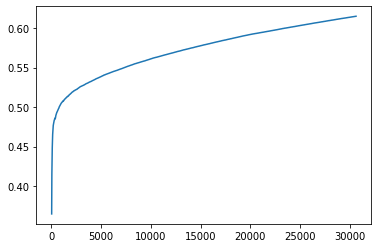

In [12]:
plt.plot(step, score_tn)

In [ ]:
step[-1]

30620

# From 45 - 60

In [13]:
with open("Oscar/Oscar/output/log.txt") as f:
  data2 = f.read().splitlines()

In [14]:
training_log2 = [item for item in data2 if 'global_step' in item]

In [15]:
idx = [training_log2.index(item) for item in training_log2 if 'global_step: 20,' in item]

In [16]:
training_log2[0]

'2022-01-02 18:03:59,303 vlpretrain INFO: Epoch: 0, global_step: 20, lr: 0.000008, loss: 1.4082 (1.5140), score: 0.7152 (0.6957)'

In [ ]:
training_log2

In [18]:
for item in training_log2:
  epoch_str, step_str, lr_str, loss_str, score_str = item.split(',')[1:]
  epoch.append(int(epoch_str[-2:].strip())+45)
  step.append(int(step_str.split(":")[-1].strip())+30620)
  lr.append(float(lr_str.split(":")[-1].strip()))
  loss_str = loss_str.split(":")[-1][:-1]
  score_str = score_str.split(":")[-1][:-1]
  loss_, loss_tn_ = loss_str.split("(")
  loss.append(float(loss_.strip()))
  loss_tn.append(float(loss_tn_.strip()))
  score_, score_tn_ = score_str.split("(")
  score.append(float(score_.strip()))
  score_tn.append(float(score_tn_.strip()))

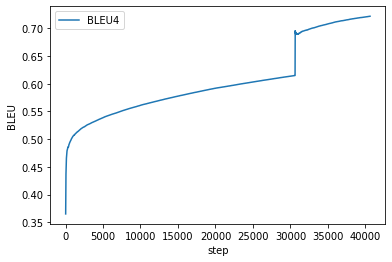

In [21]:
plt.plot(step, score_tn, label="BLEU4")
plt.legend()
plt.xlabel("step")
plt.ylabel("BLEU")
plt.savefig("BLEU_OSCAR+.png")
plt.show()

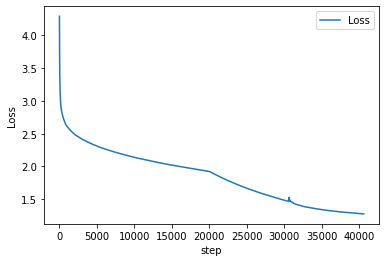

In [22]:
plt.plot(step, loss_tn, label="Loss")
plt.legend()
plt.xlabel("step")
plt.ylabel("Loss")
plt.savefig("Loss_OSCAR+.png")
plt.show()